In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 


import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split


In [2]:
def read(file_path):
    data = pd.read_csv(file_path)
    return(data)
data= read('fifa21_male2.csv')    

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [5]:
data.columns.tolist()

['ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Club',
 'BOV',
 'BP',
 'Position',
 'Player Photo',
 'Club Logo',
 'Flag Photo',
 'POT',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 

In [6]:
data.describe

<bound method NDFrame.describe of            ID             Name  Age  OVA            Nationality  \
0           2      G. Pasquale   33   69                  Italy   
1          16      Luis García   37   71                  Spain   
2          27          J. Cole   33   71                England   
3          36         D. Yorke   36   68  Trinidad &amp; Tobago   
4          41          Iniesta   36   81                  Spain   
...       ...              ...  ...  ...                    ...   
17120  259088       A. Medioub   22   64                 France   
17121  259090       W. Rickard   18   56                  Wales   
17122  259091       C. Barrett   18   56                England   
17123  259101   J. Gazibegović   20   62     Bosnia Herzegovina   
17124  259105  Pablo Rodríguez   18   59                  Spain   

                Club  BOV   BP      Position  \
0            Udinese   71  LWB            LM   
1          KAS Eupen   70   CM    CM CAM CDM   
2      Coventry C

### Data Cleaning

#### Standardize the column names

In [7]:
data.columns = [column.lower().replace(' ', '_') for column in data.columns]
data.columns.tolist()

['id',
 'name',
 'age',
 'ova',
 'nationality',
 'club',
 'bov',
 'bp',
 'position',
 'player_photo',
 'club_logo',
 'flag_photo',
 'pot',
 'team_&_contract',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'loan_date_end',
 'value',
 'wage',
 'release_clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 

### Choosing id as index

In [8]:
data.set_index('id', inplace = True)

In [9]:
data.head()

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


### Finding Nulls

In [10]:
pd.set_option('display.max_rows', 110) 
# pointing out the nulls and displaying all rows (columns listed)

data.isna().sum()

name                    0
age                     0
ova                     0
nationality             0
club                   23
bov                     0
bp                      0
position              413
player_photo            0
club_logo              23
flag_photo              0
pot                     0
team_&_contract         0
height                  0
weight                  0
foot                    0
growth                  0
joined                 58
loan_date_end       16215
value                   0
wage                    0
release_clause          0
contract                0
attacking               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                58
skill                   0
dribbling               0
curve                  58
fk_accuracy             0
long_passing            0
ball_control            0
movement                0
acceleration            0
sprint_speed            0
agility     

### Dealing with nulls 

#### dropping for those null values the rows

In [11]:
data= data.dropna(subset = ['volleys', 'curve', 'agility', 'balance','jumping',
                      'position','composure','a/w','d/w','club','joined'])



#### dropping the whole column 'loan_date_end', because for most of the rows(16215) this column has nulls:

In [12]:
data = data.drop('loan_date_end', 1)

#### dropping column, because it is not of interest

In [13]:
data=data.drop('player_photo',1)
data=data.drop('club_logo',1)
data=data.drop('flag_photo',1)
data.isna().sum() # checking if all nulls are gone

name                0
age                 0
ova                 0
nationality         0
club                0
bov                 0
bp                  0
position            0
pot                 0
team_&_contract     0
height              0
weight              0
foot                0
growth              0
joined              0
value               0
wage                0
release_clause      0
contract            0
attacking           0
crossing            0
finishing           0
heading_accuracy    0
short_passing       0
volleys             0
skill               0
dribbling           0
curve               0
fk_accuracy         0
long_passing        0
ball_control        0
movement            0
acceleration        0
sprint_speed        0
agility             0
reactions           0
balance             0
power               0
shot_power          0
jumping             0
stamina             0
strength            0
long_shots          0
mentality           0
aggression          0
intercepti

#### looking at some columns...

In [14]:
data['a/w'].value_counts()

Medium    10618
High       5008
Low         788
Name: a/w, dtype: int64

In [15]:
data['growth']

id
16         0
41         0
80         0
330        0
1179       0
          ..
259088     5
259090    10
259091    11
259101    11
259105    15
Name: growth, Length: 16414, dtype: int64

In [16]:
data['volleys'].unique()

array([68., 79., 69., 84., 17., 90., 11., 67., 20., 63., 75., 32., 52.,
       14., 71., 72., 64., 83., 80., 18., 34., 55., 54., 74., 12., 15.,
       51., 35., 86., 56., 73., 42., 49., 78., 57., 59., 62., 66., 88.,
       70., 50., 58., 26., 77., 76., 82., 53., 40., 37., 30., 44.,  9.,
       16., 13., 10., 23., 33., 36., 19., 29., 61., 25., 48., 45., 28.,
       43., 46., 39., 81., 60., 38., 31., 65., 47., 85., 27.,  7.,  8.,
       22., 21., 41.,  5., 24.,  4., 89., 87.,  6.])

In [17]:
data['joined']

id
16        Jul 19, 2014
41        Jul 16, 2018
80         Jul 2, 2019
330        Aug 1, 2011
1179       Jul 4, 2019
              ...     
259088    Sep 29, 2020
259090    Aug 20, 2020
259091    Aug 20, 2020
259101    Sep 30, 2020
259105    Sep 30, 2020
Name: joined, Length: 16414, dtype: object

In [18]:
data['skill'].tolist()

[369,
 408,
 406,
 374,
 122,
 423,
 106,
 75,
 349,
 103,
 296,
 318,
 244,
 271,
 399,
 108,
 298,
 359,
 411,
 366,
 428,
 403,
 392,
 345,
 416,
 379,
 91,
 235,
 244,
 281,
 408,
 120,
 328,
 102,
 81,
 227,
 200,
 409,
 407,
 393,
 414,
 362,
 281,
 375,
 368,
 307,
 344,
 277,
 379,
 327,
 319,
 316,
 248,
 397,
 356,
 333,
 409,
 413,
 373,
 368,
 339,
 340,
 259,
 338,
 347,
 108,
 303,
 99,
 122,
 300,
 237,
 351,
 362,
 82,
 320,
 285,
 310,
 107,
 312,
 90,
 344,
 366,
 92,
 260,
 331,
 301,
 94,
 354,
 274,
 364,
 313,
 243,
 313,
 100,
 121,
 301,
 253,
 91,
 369,
 356,
 402,
 299,
 362,
 76,
 382,
 96,
 326,
 100,
 98,
 321,
 101,
 81,
 93,
 369,
 355,
 352,
 208,
 362,
 383,
 373,
 110,
 100,
 373,
 167,
 107,
 81,
 368,
 363,
 368,
 391,
 319,
 71,
 97,
 327,
 309,
 105,
 80,
 320,
 88,
 305,
 97,
 178,
 284,
 78,
 294,
 94,
 91,
 381,
 239,
 302,
 303,
 327,
 226,
 333,
 333,
 314,
 315,
 235,
 149,
 369,
 350,
 346,
 310,
 351,
 105,
 335,
 381,
 256,
 314,
 193,
 38

In [19]:
data.index

Int64Index([    16,     41,     80,    330,   1179,   1238,   2147,   2196,
              2492,   2651,
            ...
            259078, 259082, 259083, 259084, 259085, 259088, 259090, 259091,
            259101, 259105],
           dtype='int64', name='id', length=16414)

### Dealing with Categoricals 


In [20]:
data['value'].tolist() 

['€600K',
 '€5.5M',
 '€2.8M',
 '€5.5M',
 '€2.2M',
 '€1.5M',
 '€325K',
 '€900K',
 '€3M',
 '€500K',
 '€0',
 '€850K',
 '€45K',
 '€0',
 '€575K',
 '€1.3M',
 '€1.6M',
 '€375K',
 '€3.4M',
 '€1.8M',
 '€2.2M',
 '€5.5M',
 '€4.2M',
 '€350K',
 '€5M',
 '€6.5M',
 '€45K',
 '€0',
 '€1M',
 '€80K',
 '€1.4M',
 '€450K',
 '€1.5M',
 '€240K',
 '€400K',
 '€45K',
 '€550K',
 '€6M',
 '€4.2M',
 '€3.9M',
 '€46M',
 '€3M',
 '€30K',
 '€1M',
 '€0',
 '€1.4M',
 '€275K',
 '€15K',
 '€0',
 '€80K',
 '€190K',
 '€100K',
 '€210K',
 '€9.5M',
 '€275K',
 '€425K',
 '€5M',
 '€6M',
 '€1.3M',
 '€325K',
 '€275K',
 '€1.5M',
 '€210K',
 '€1.1M',
 '€275K',
 '€675K',
 '€475K',
 '€2.4M',
 '€575K',
 '€925K',
 '€240K',
 '€4.7M',
 '€4.5M',
 '€400K',
 '€1.4M',
 '€1.1M',
 '€900K',
 '€425K',
 '€475K',
 '€50K',
 '€775K',
 '€325K',
 '€170K',
 '€130K',
 '€1.2M',
 '€2.6M',
 '€400K',
 '€7M',
 '€0',
 '€2.9M',
 '€3.2M',
 '€8.5M',
 '€190K',
 '€325K',
 '€180K',
 '€140K',
 '€625K',
 '€3K',
 '€900K',
 '€1.6M',
 '€4.3M',
 '€450K',
 '€500K',
 '€10K',
 '€2.5M'

#### transforming some categoricals into floats

In [21]:
# transforming values into floats
data['value'] = data['value'].apply(lambda x: str(x).replace('€', ''))
data['value'].tolist()
data['value'] = data['value'].apply(lambda x: str(x).replace('K', '000'))
data['value'] = data['value'].apply(lambda x: str(x).replace('M', '000000'))
data['value']=data['value'].apply(lambda x: float(x))


In [22]:
data['value'].tolist()

[600000.0,
 5.5,
 2.8,
 5.5,
 2.2,
 1.5,
 325000.0,
 900000.0,
 3000000.0,
 500000.0,
 0.0,
 850000.0,
 45000.0,
 0.0,
 575000.0,
 1.3,
 1.6,
 375000.0,
 3.4,
 1.8,
 2.2,
 5.5,
 4.2,
 350000.0,
 5000000.0,
 6.5,
 45000.0,
 0.0,
 1000000.0,
 80000.0,
 1.4,
 450000.0,
 1.5,
 240000.0,
 400000.0,
 45000.0,
 550000.0,
 6000000.0,
 4.2,
 3.9,
 46000000.0,
 3000000.0,
 30000.0,
 1000000.0,
 0.0,
 1.4,
 275000.0,
 15000.0,
 0.0,
 80000.0,
 190000.0,
 100000.0,
 210000.0,
 9.5,
 275000.0,
 425000.0,
 5000000.0,
 6000000.0,
 1.3,
 325000.0,
 275000.0,
 1.5,
 210000.0,
 1.1,
 275000.0,
 675000.0,
 475000.0,
 2.4,
 575000.0,
 925000.0,
 240000.0,
 4.7,
 4.5,
 400000.0,
 1.4,
 1.1,
 900000.0,
 425000.0,
 475000.0,
 50000.0,
 775000.0,
 325000.0,
 170000.0,
 130000.0,
 1.2,
 2.6,
 400000.0,
 7000000.0,
 0.0,
 2.9,
 3.2,
 8.5,
 190000.0,
 325000.0,
 180000.0,
 140000.0,
 625000.0,
 3000.0,
 900000.0,
 1.6,
 4.3,
 450000.0,
 500000.0,
 10000.0,
 2.5,
 2.4,
 300000.0,
 80000.0,
 400000.0,
 6.5,
 13000

In [23]:
data['w/f'].tolist() # w/f weak foot, points for how good the player is with his weak foot
data['w/f'].unique()


array(['4 ★', '2 ★', '5 ★', '1 ★', '3 ★'], dtype=object)

In [24]:
data['w/f']=data['w/f'].apply(lambda x: int(x[0]))# cutting of the spaces with stars and 
# converting number in int , since they have a hirarchical meaning like a grade in school.
data['w/f']

id
16        4
41        4
80        4
330       4
1179      2
         ..
259088    2
259090    3
259091    3
259101    4
259105    3
Name: w/f, Length: 16414, dtype: int64

In [25]:
data['sm'].unique()

array(['3★', '4★', '1★', '2★', '5★'], dtype=object)

In [26]:
data['sm'].tolist()

['3★',
 '4★',
 '4★',
 '3★',
 '1★',
 '3★',
 '1★',
 '1★',
 '3★',
 '1★',
 '2★',
 '3★',
 '2★',
 '2★',
 '3★',
 '1★',
 '2★',
 '3★',
 '3★',
 '3★',
 '2★',
 '4★',
 '3★',
 '2★',
 '4★',
 '4★',
 '1★',
 '2★',
 '2★',
 '2★',
 '3★',
 '1★',
 '3★',
 '1★',
 '1★',
 '2★',
 '2★',
 '4★',
 '5★',
 '4★',
 '5★',
 '2★',
 '3★',
 '3★',
 '4★',
 '3★',
 '2★',
 '3★',
 '3★',
 '3★',
 '3★',
 '3★',
 '2★',
 '5★',
 '2★',
 '3★',
 '4★',
 '2★',
 '4★',
 '3★',
 '3★',
 '3★',
 '2★',
 '3★',
 '3★',
 '1★',
 '2★',
 '1★',
 '1★',
 '2★',
 '2★',
 '3★',
 '3★',
 '1★',
 '3★',
 '3★',
 '2★',
 '1★',
 '3★',
 '1★',
 '3★',
 '3★',
 '1★',
 '2★',
 '2★',
 '3★',
 '1★',
 '2★',
 '2★',
 '3★',
 '2★',
 '2★',
 '3★',
 '1★',
 '1★',
 '2★',
 '2★',
 '1★',
 '3★',
 '2★',
 '3★',
 '3★',
 '3★',
 '1★',
 '3★',
 '1★',
 '3★',
 '1★',
 '1★',
 '3★',
 '1★',
 '1★',
 '1★',
 '3★',
 '2★',
 '3★',
 '2★',
 '3★',
 '4★',
 '4★',
 '1★',
 '1★',
 '3★',
 '2★',
 '1★',
 '1★',
 '2★',
 '2★',
 '4★',
 '4★',
 '3★',
 '1★',
 '1★',
 '3★',
 '2★',
 '1★',
 '1★',
 '3★',
 '1★',
 '2★',
 '1★',
 '2★',
 '2★',

In [27]:
data['ir'].unique()

array(['1 ★', '4 ★', '2 ★', '3 ★', '5 ★'], dtype=object)

In [28]:
data['pac'].unique()

array([53, 58, 44, 68, 77, 38, 69, 70, 76, 43, 66, 29, 40, 82, 31, 65, 33,
       54, 73, 55, 74, 63, 36, 34, 72, 60, 89, 35, 30, 37, 52, 64, 39, 32,
       62, 47, 59, 61, 26, 57, 80, 81, 71, 51, 56, 67, 75, 46, 85, 42, 48,
       45, 50, 79, 49, 90, 87, 78, 41, 84, 88, 86, 83, 92, 91, 93, 94, 96,
       28, 95, 25])

In [29]:
data['rw'].tolist()

['67+0',
 '79+0',
 '72+0',
 '79+0',
 '30+0',
 '78+1',
 '26+0',
 '22+0',
 '72+1',
 '27+0',
 '59+-1',
 '68+0',
 '45+0',
 '54+1',
 '73+1',
 '31+0',
 '66+0',
 '62+0',
 '75+1',
 '73+0',
 '68+2',
 '77+0',
 '77+0',
 '66+0',
 '81+-1',
 '77+1',
 '24+0',
 '43+0',
 '49+1',
 '57+0',
 '76+1',
 '28+0',
 '73+1',
 '29+0',
 '25+0',
 '55+0',
 '47+0',
 '74+0',
 '79+0',
 '74+0',
 '89+0',
 '69+1',
 '56+0',
 '66+0',
 '70+0',
 '64+0',
 '53+1',
 '52+0',
 '63+0',
 '66+0',
 '57+0',
 '65+0',
 '58+0',
 '78+0',
 '63+0',
 '66+0',
 '80+0',
 '71+2',
 '72+0',
 '64+0',
 '65+0',
 '65+1',
 '42+0',
 '70+0',
 '65+0',
 '31+0',
 '54+0',
 '27+0',
 '31+0',
 '60+0',
 '51+0',
 '75+0',
 '62+1',
 '24+0',
 '70+0',
 '64+0',
 '64+0',
 '29+0',
 '66+1',
 '27+0',
 '67+1',
 '66+0',
 '24+0',
 '46+0',
 '62+0',
 '68+0',
 '27+0',
 '66+0',
 '50+0',
 '77+0',
 '62+1',
 '46+1',
 '59+0',
 '26+0',
 '30+0',
 '60+0',
 '47+0',
 '20+0',
 '70+0',
 '62+0',
 '75+0',
 '69+0',
 '69+0',
 '25+0',
 '73+0',
 '28+0',
 '68+0',
 '26+0',
 '24+0',
 '73+0',
 '27+1',

In [30]:
data['dri'].unique()

array([69, 85, 77, 82, 78, 81, 70, 73, 63, 51, 56, 67, 66, 72, 80, 86, 62,
       49, 50, 59, 75, 65, 68, 55, 52, 83, 79, 89, 61, 74, 71, 64, 60, 76,
       45, 57, 47, 48, 32, 40, 36, 53, 54, 84, 46, 58, 41, 88, 29, 42, 95,
       43, 87, 39, 90, 44, 92, 34, 37, 91, 94, 38, 35, 31, 33, 30, 28])

In [31]:
data['bp'].value_counts()

CB     3095
ST     2545
CAM    2151
GK     1494
RM     1375
CDM    1193
CM      944
LB      901
RB      874
LM      789
RW      302
RWB     244
LWB     241
LW      195
CF       71
Name: bp, dtype: int64

In [32]:
data['penalties'].unique()


array([75, 71, 85, 22, 86, 23, 17, 64, 44, 60, 72, 47, 38, 84, 24, 78, 74,
       46, 52, 61, 13, 87, 33, 15, 55, 40, 89, 73, 67, 63, 81, 62, 58, 83,
       69, 59, 80, 68, 51, 70, 25, 36, 42, 21, 57, 79, 65, 20, 50, 11, 16,
       26, 49, 77, 27, 39, 76, 88, 31, 18, 41, 30, 56, 48, 53, 12, 82, 43,
       34, 66, 10, 90, 54,  9, 45, 92, 14, 37, 28, 35, 19, 32, 29, 91,  7,
        8])

In [33]:
cat = data.select_dtypes('object')
cat

,name,nationality,club,bp,position,team_&_contract,height,weight,foot,joined,wage,release_clause,contract,sm,a/w,d/w,ir,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,"Jul 19, 2014",€7K,€1.1M,2014 ~ 2019,3★,Medium,Medium,1 ★,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
41,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,"Jul 16, 2018",€12K,€7.2M,2018 ~ 2021,4★,High,Medium,4 ★,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
80,E. Belözoğlu,Turkey,Fenerbahçe SK,CM,CM CDM,Fenerbahçe SK 2019 ~ 2020,"5'7""",159lbs,Left,"Jul 2, 2019",€44K,€5.3M,2019 ~ 2020,4★,Medium,Medium,2 ★,7,66+2,66+2,66+2,72+0,72+0,72+0,72+0,72+0,75+2,75+2,75+2,72+2,76+1,76+1,76+1,72+2,66+2,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2,Male
330,R. Keane,Republic of Ireland,LA Galaxy,CF,ST,LA Galaxy 2011 ~ 2022,"5'9""",161lbs,Right,"Aug 1, 2011",€10K,€0,2011 ~ 2022,3★,High,Low,2 ★,10,79+1,79+1,79+1,79+0,81+-1,81+-1,81+-1,79+0,81+-1,81+-1,81+-1,78+1,74+1,74+1,74+1,78+1,57+1,57+1,57+1,57+1,57+1,52+1,47+1,47+1,47+1,52+1,20+1,Male
1179,G. Buffon,Italy,Juventus,GK,GK,Juventus 2019 ~ 2021,"6'4""",203lbs,Right,"Jul 4, 2019",€41K,€3.6M,2019 ~ 2021,1★,Medium,Medium,4 ★,154,31+3,31+3,31+3,30+0,33+0,33+0,33+0,30+0,34+3,34+3,34+3,32+3,35+3,35+3,35+3,32+3,28+3,33+3,33+3,33+3,28+3,26+3,29+3,29+3,29+3,26+3,80+2,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,France,CD Tondela,CB,CB,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,"Sep 29, 2020",€2K,€0,"Jun 30, 2021 On Loan",2★,Medium,Medium,1 ★,5,43+2,43+2,43+2,41+0,41+0,41+0,41+0,41+0,41+2,41+2,41+2,43+2,44+2,44+2,44+2,43+2,54+2,55+2,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
259090,W. Rickard,Wales,Burnley,CAM,CAM CM,Burnley 2020 ~ 2021,"5'10""",170lbs,Right,"Aug 20, 2020",€3K,€273K,2020 ~ 2021,2★,Medium,Medium,1 ★,5,53+2,53+2,53+2,55+0,54+0,54+0,54+0,55+0,56+2,56+2,56+2,56+2,55+2,55+2,55+2,56+2,53+2,52+2,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
259091,C. Barrett,England,Burnley,RB,RB,Burnley 2020 ~ 2022,"5'9""",154lbs,Right,"Aug 20, 2020",€2K,€273K,2020 ~ 2022,2★,Medium,Medium,1 ★,3,46+2,46+2,46+2,50+0,47+0,47+0,47+0,50+0,47+2,47+2,47+2,50+2,46+2,46+2,46+2,50+2,54+2,50+2,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male


In [34]:
data.describe()

,age,ova,bov,pot,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,pac,sho,pas,dri,def,phy
count,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,1.641400e+04,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000,16414.000000
mean,25.009687,66.889667,67.852626,72.567503,5.677836,1.207639e+06,258.127452,51.504874,47.890459,53.468320,60.443036,44.820763,266.148897,57.876264,49.405629,44.089740,54.189107,60.588156,323.712623,65.707689,65.717985,64.728524,62.792251,64.766175,302.458633,59.599915,65.149507,63.534483,65.217619,48.957110,261.284391,56.811076,46.906482,52.278725,55.326185,49.961923,59.853905,141.643231,47.268247,48.273608,46.101377,77.250213,15.549043,15.383819,15.266541,15.412270,15.638540,1630.625442,361.144694,2.984830,68.341599,54.790423,58.776045,64.177044,50.197149,64.862435
std,4.755673,6.856491,6.633380,5.712889,5.805560,4.202274e+06,71.884090,17.809438,19.370079,16.845894,13.879363,17.621128,76.421054,18.000257,18.079351,17.321716,14.809534,15.795477,54.446360,14.565821,14.327479,14.361638,9.028943,14.015890,49.191411,13.262158,11.908067,15.245752,12.619208,18.996349,62.563281,16.999237,20.829864,19.029784,13.667754,15.508241,11.752924,61.426439,20.094673,21.447060,21.146853,80.696581,16.736688,16.023527,15.720117,16.268181,17.041812,259.767123,40.343465,0.671427,10.965096,13.880826,10.152810,9.827016,16.829196,9.674157
min,16.000000,45.000000,44.000000,47.000000,0.000000,0.000000e+00,42.000000,6.000000,3.000000,5.000000,7.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,122.000000,12.000000,13.000000,14.000000,24.000000,17.000000,128.000000,14.000000,22.000000,11.000000,16.000000,4.000000,50.000000,9.000000,4.000000,2.000000,10.000000,7.000000,12.000000,20.000000,3.000000,5.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,731.000000,228.000000,1.000000,25.000000,16.000000,25.000000,28.000000,13.000000,27.000000
25%,21.000000,62.000000,64.000000,69.000000,0.000000,4.300000e+00,231.000000,40.000000,33.000000,46.000000,56.000000,32.000000,232.000000,53.000000,37.000000,32.000000,45.000000,57.000000,296.000000,59.000000,59.000000,57.000000,57.000000,57.000000,272.000000,50.000000,58.000000,56.000000,58.000000,35.000000,234.000000,45.000000,26.000000,43.000000,46.000000,40.000000,53.000000,85.000000,30.000000,28.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1492.000000,333.000000,3.000000,62.000000,45.000000,52.000000,59.000000,35.000000,59.000000
50%,24.000000,67.000000,68.000000,72.000000,4.000000,2.750000e+05,270.000000,56.000000,52.000000,56.000000,63.000000,46.000000,278.000000,63.000000,51.000000,43.000000,57.000000,64.000000,332.000000,68.000000,68.000000,67.000000,63.000000,67.000000,308.000000,61.000000,66.000000,66.000000,66.000000,53.000000,269.000000,59.000000,53.000000,57.000000,57.000000,51.000000,61.000000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1658.000000,362.000

#### Thinking about taking Finishing (The accuracy of shots using foot, inside the penalty)
#### as a target value... 
#### ...But Not understood: includes very high values



In [35]:
pd.set_option('display.max_columns', 110)
cat = data.select_dtypes('object')
cat



,name,nationality,club,bp,position,team_&_contract,height,weight,foot,joined,wage,release_clause,contract,sm,a/w,d/w,ir,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,"Jul 19, 2014",€7K,€1.1M,2014 ~ 2019,3★,Medium,Medium,1 ★,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
41,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,"Jul 16, 2018",€12K,€7.2M,2018 ~ 2021,4★,High,Medium,4 ★,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
80,E. Belözoğlu,Turkey,Fenerbahçe SK,CM,CM CDM,Fenerbahçe SK 2019 ~ 2020,"5'7""",159lbs,Left,"Jul 2, 2019",€44K,€5.3M,2019 ~ 2020,4★,Medium,Medium,2 ★,7,66+2,66+2,66+2,72+0,72+0,72+0,72+0,72+0,75+2,75+2,75+2,72+2,76+1,76+1,76+1,72+2,66+2,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2,Male
330,R. Keane,Republic of Ireland,LA Galaxy,CF,ST,LA Galaxy 2011 ~ 2022,"5'9""",161lbs,Right,"Aug 1, 2011",€10K,€0,2011 ~ 2022,3★,High,Low,2 ★,10,79+1,79+1,79+1,79+0,81+-1,81+-1,81+-1,79+0,81+-1,81+-1,81+-1,78+1,74+1,74+1,74+1,78+1,57+1,57+1,57+1,57+1,57+1,52+1,47+1,47+1,47+1,52+1,20+1,Male
1179,G. Buffon,Italy,Juventus,GK,GK,Juventus 2019 ~ 2021,"6'4""",203lbs,Right,"Jul 4, 2019",€41K,€3.6M,2019 ~ 2021,1★,Medium,Medium,4 ★,154,31+3,31+3,31+3,30+0,33+0,33+0,33+0,30+0,34+3,34+3,34+3,32+3,35+3,35+3,35+3,32+3,28+3,33+3,33+3,33+3,28+3,26+3,29+3,29+3,29+3,26+3,80+2,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,France,CD Tondela,CB,CB,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,"Sep 29, 2020",€2K,€0,"Jun 30, 2021 On Loan",2★,Medium,Medium,1 ★,5,43+2,43+2,43+2,41+0,41+0,41+0,41+0,41+0,41+2,41+2,41+2,43+2,44+2,44+2,44+2,43+2,54+2,55+2,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
259090,W. Rickard,Wales,Burnley,CAM,CAM CM,Burnley 2020 ~ 2021,"5'10""",170lbs,Right,"Aug 20, 2020",€3K,€273K,2020 ~ 2021,2★,Medium,Medium,1 ★,5,53+2,53+2,53+2,55+0,54+0,54+0,54+0,55+0,56+2,56+2,56+2,56+2,55+2,55+2,55+2,56+2,53+2,52+2,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
259091,C. Barrett,England,Burnley,RB,RB,Burnley 2020 ~ 2022,"5'9""",154lbs,Right,"Aug 20, 2020",€2K,€273K,2020 ~ 2022,2★,Medium,Medium,1 ★,3,46+2,46+2,46+2,50+0,47+0,47+0,47+0,50+0,47+2,47+2,47+2,50+2,46+2,46+2,46+2,50+2,54+2,50+2,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male


### to drop: because not of interest:
#### name, nationality,club, team&contract, joined, release clause, contract, gender, gk (gk to drop because going for penaties as target value)
##### thinking about keeping club, but there would be so many columns then, when I will dummy the categoricals, so drop it aswell

In [36]:
data = data.drop(['name','nationality','club','team_&_contract','joined','release_clause','contract','gender','gk'],axis=1)

In [37]:
data['wage']

id
16         €7K
41        €12K
80        €44K
330       €10K
1179      €41K
          ... 
259088     €2K
259090     €3K
259091     €2K
259101     €3K
259105     €2K
Name: wage, Length: 16414, dtype: object

#### changing height, weight, wage in floats

In [38]:
data['wage'] = data['wage'].apply(lambda x: str(x).replace('€', '').replace('K', '000')
                                  .replace('M', '000000'))
data['wage']=data['wage'].apply(lambda x: float(x))
data['wage']

id
16         7000.0
41        12000.0
80        44000.0
330       10000.0
1179      41000.0
           ...   
259088     2000.0
259090     3000.0
259091     2000.0
259101     3000.0
259105     2000.0
Name: wage, Length: 16414, dtype: float64

#### seperating foot and height of 'height' so to deal with them and converting it all to feet

In [39]:
data['height_foot'] = data['height'].apply(lambda x: str(x).replace('"',''))
data['height_foot'] =data['height'].str[0]
data['height_foot']=data['height_foot'].apply(lambda x: float(x))

In [40]:
#1 Inch = 0.083333333 Feet
data['height_inch']=data['height'].str[2:]
data['height_inch'] = data['height_inch'].apply(lambda x: str(x).replace('"',''))
data['height_inch']=data['height_inch'].apply(lambda x: float(x))
data['height_inch']
data['height_inch'] = data['height_inch']*0.083333333
data['height_inch']

id
16        0.833333
41        0.583333
80        0.583333
330       0.750000
1179      0.333333
            ...   
259088    0.500000
259090    0.833333
259091    0.750000
259101    0.750000
259105    0.833333
Name: height_inch, Length: 16414, dtype: float64

In [41]:
data['height']=data['height_foot']+data['height_inch']
data['height']

id
16        5.833333
41        5.583333
80        5.583333
330       5.750000
1179      6.333333
            ...   
259088    6.500000
259090    5.833333
259091    5.750000
259101    5.750000
259105    5.833333
Name: height, Length: 16414, dtype: float64

In [42]:
#changing weight into floats
data['weight'] = data['weight'].apply(lambda x: str(x).replace('lbs',''))
data['weight']= data['weight'].apply(lambda x: float(x))
data['weight']

id
16        143.0
41        150.0
80        159.0
330       161.0
1179      203.0
          ...  
259088    165.0
259090    170.0
259091    154.0
259101    148.0
259105    154.0
Name: weight, Length: 16414, dtype: float64

### changing all columns from 'ls' to 'rb' in floats, cutting off the plus/minus values, because they are values, 
### plus getting rid of the +/+- boosts(?). The values infront alone should be valid and I didn't understand the boosts

In [43]:

data['ls'] = data['ls'].apply(lambda x: str(x).replace('-',''))
data['ls']=data['ls'].str[0:-2]
data['ls']=data['ls'].apply(lambda x: float(x))
data['ls'].unique()

array([67., 72., 66., 79., 31., 75., 29., 24., 28., 61., 71., 46., 58.,
       63., 69., 77., 78., 25., 44., 55., 57., 30., 27., 51., 76., 91.,
       68., 54., 73., 52., 60., 59., 62., 82., 64., 65., 48., 26., 23.,
       70., 80., 50., 43., 74., 45., 53., 47., 33., 32., 49., 56., 42.,
       36., 87., 89., 38., 34., 86., 39., 83., 35., 81., 84., 41., 21.,
       22., 85., 40., 20., 37., 88., 19., 17., 18., 15., 16.])

### do it for all those columns
#### st	rs	lw	lf	cf	rf	rw	lam	cam	ram	lm	lcm	cm	rcm	rm	lwb	ldm	cdm	rdm	rwb	lb	lcb	cb rcb	rb		

In [44]:
										
data['st'] = data['st'].apply(lambda x: str(x).replace('-',''))
data['st']=data['st'].str[0:-2]
data['st']=data['st'].apply(lambda x: float(x))
data['st'].unique()

array([67., 72., 66., 79., 31., 75., 29., 24., 28., 61., 71., 46., 58.,
       63., 69., 77., 78., 25., 44., 55., 57., 30., 27., 51., 76., 91.,
       68., 54., 73., 52., 60., 59., 62., 82., 64., 65., 48., 26., 23.,
       70., 80., 50., 43., 74., 45., 53., 47., 33., 32., 49., 56., 42.,
       36., 87., 89., 38., 34., 86., 39., 83., 35., 81., 84., 41., 21.,
       22., 85., 40., 20., 37., 88., 19., 17., 18., 15., 16.])

In [45]:
data['rs'] = data['rs'].apply(lambda x: str(x).replace('-',''))
data['rs']=data['rs'].str[0:-2]
data['rs']=data['rs'].apply(lambda x: float(x))
data['rs'].unique()

array([67., 72., 66., 79., 31., 75., 29., 24., 28., 61., 71., 46., 58.,
       63., 69., 77., 78., 25., 44., 55., 57., 30., 27., 51., 76., 91.,
       68., 54., 73., 52., 60., 59., 62., 82., 64., 65., 48., 26., 23.,
       70., 80., 50., 43., 74., 45., 53., 47., 33., 32., 49., 56., 42.,
       36., 87., 89., 38., 34., 86., 39., 83., 35., 81., 84., 41., 21.,
       22., 85., 40., 20., 37., 88., 19., 17., 18., 15., 16.])

In [46]:
data['lw'] = data['lw'].apply(lambda x: str(x).replace('-',''))
data['lw']=data['lw'].str[0:-2]
data['lw']=data['lw'].apply(lambda x: float(x))
data['lw'].unique()

array([67., 79., 72., 30., 78., 26., 22., 27., 59., 68., 45., 54., 73.,
       31., 66., 62., 75., 77., 81., 24., 43., 49., 57., 76., 28., 29.,
       25., 55., 47., 74., 89., 69., 56., 70., 64., 53., 52., 63., 65.,
       58., 80., 71., 42., 60., 51., 46., 50., 20., 23., 44., 36., 37.,
       35., 61., 39., 40., 86., 48., 32., 92., 21., 34., 85., 33., 83.,
       38., 41., 82., 84., 87., 90., 88., 19., 18., 17., 16., 15., 14.])

In [47]:
data['cf'] = data['cf'].apply(lambda x: str(x).replace('-',''))
data['cf']=data['cf'].str[0:-2]
data['cf']=data['cf'].apply(lambda x: float(x))
data['cf'].unique()

array([68., 79., 72., 81., 33., 29., 23., 71., 28., 60., 69., 45., 56.,
       75., 63., 74., 67., 78., 76., 25., 43., 52., 58., 77., 31., 27.,
       49., 91., 65., 73., 55., 53., 64., 61., 66., 80., 44., 70., 32.,
       51., 50., 62., 30., 26., 46., 37., 59., 42., 57., 47., 48., 40.,
       22., 84., 24., 88., 34., 93., 36., 54., 87., 35., 82., 39., 83.,
       38., 85., 86., 20., 89., 21., 41., 19., 18., 17., 15., 16.])

In [48]:
data['rf'] = data['rf'].apply(lambda x: str(x).replace('-',''))
data['rf']=data['rf'].str[0:-2]
data['rf']=data['rf'].apply(lambda x: float(x))
data['rf'].unique()

array([68., 79., 72., 81., 33., 29., 23., 71., 28., 60., 69., 45., 56.,
       75., 63., 74., 67., 78., 76., 25., 43., 52., 58., 77., 31., 27.,
       49., 91., 65., 73., 55., 53., 64., 61., 66., 80., 44., 70., 32.,
       51., 50., 62., 30., 26., 46., 37., 59., 42., 57., 47., 48., 40.,
       22., 84., 24., 88., 34., 93., 36., 54., 87., 35., 82., 39., 83.,
       38., 85., 86., 20., 89., 21., 41., 19., 18., 17., 15., 16.])

In [49]:
data['rw'] = data['rw'].apply(lambda x: str(x).replace('-',''))
data['rw']=data['rw'].str[0:-2]
data['rw']=data['rw'].apply(lambda x: float(x))
data['rw'].unique()

array([67., 79., 72., 30., 78., 26., 22., 27., 59., 68., 45., 54., 73.,
       31., 66., 62., 75., 77., 81., 24., 43., 49., 57., 76., 28., 29.,
       25., 55., 47., 74., 89., 69., 56., 70., 64., 53., 52., 63., 65.,
       58., 80., 71., 42., 60., 51., 46., 50., 20., 23., 44., 36., 37.,
       35., 61., 39., 40., 86., 48., 32., 92., 21., 34., 85., 33., 83.,
       38., 41., 82., 84., 87., 90., 88., 19., 18., 17., 16., 15., 14.])

In [50]:
data['lam'] = data['lam'].apply(lambda x: str(x).replace('-',''))
data['lam']=data['lam'].str[0:-2]
data['lam']=data['lam'].apply(lambda x: float(x))
data['lam'].unique()

array([70., 82., 75., 81., 34., 30., 24., 29., 59., 67., 48., 57., 76.,
       33., 64., 78., 74., 72., 68., 77., 26., 46., 53., 73., 32., 55.,
       49., 79., 88., 56., 66., 65., 62., 44., 31., 35., 61., 28., 69.,
       54., 51., 60., 50., 71., 27., 37., 43., 25., 52., 63., 47., 42.,
       45., 58., 80., 85., 86., 93., 23., 39., 36., 38., 22., 84., 41.,
       83., 21., 87., 40., 90., 89., 20., 19., 18., 17., 16., 15.])

In [51]:
data['cam'] = data['cam'].apply(lambda x: str(x).replace('-',''))
data['cam']=data['cam'].str[0:-2]
data['cam']=data['cam'].apply(lambda x: float(x))
data['cam'].unique()

array([70., 82., 75., 81., 34., 30., 24., 29., 59., 67., 48., 57., 76.,
       33., 64., 78., 74., 72., 68., 77., 26., 46., 53., 73., 32., 55.,
       49., 79., 88., 56., 66., 65., 62., 44., 31., 35., 61., 28., 69.,
       54., 51., 60., 50., 71., 27., 37., 43., 25., 52., 63., 47., 42.,
       45., 58., 80., 85., 86., 93., 23., 39., 36., 38., 22., 84., 41.,
       83., 21., 87., 40., 90., 89., 20., 19., 18., 17., 16., 15.])

In [52]:
data['ram'] = data['ram'].apply(lambda x: str(x).replace('-',''))
data['ram']=data['ram'].str[0:-2]
data['ram']=data['ram'].apply(lambda x: float(x))
data['ram'].unique()

array([70., 82., 75., 81., 34., 30., 24., 29., 59., 67., 48., 57., 76.,
       33., 64., 78., 74., 72., 68., 77., 26., 46., 53., 73., 32., 55.,
       49., 79., 88., 56., 66., 65., 62., 44., 31., 35., 61., 28., 69.,
       54., 51., 60., 50., 71., 27., 37., 43., 25., 52., 63., 47., 42.,
       45., 58., 80., 85., 86., 93., 23., 39., 36., 38., 22., 84., 41.,
       83., 21., 87., 40., 90., 89., 20., 19., 18., 17., 16., 15.])

In [53]:
data['lm'] = data['lm'].apply(lambda x: str(x).replace('-',''))
data['lm']=data['lm'].str[0:-2]
data['lm']=data['lm'].apply(lambda x: float(x))
data['lm'].unique()

array([68., 79., 72., 78., 32., 77., 29., 23., 71., 28., 57., 66., 47.,
       54., 73., 64., 62., 74., 69., 75., 76., 26., 45., 51., 56., 30.,
       48., 88., 52., 67., 58., 65., 63., 43., 31., 53., 25., 60., 49.,
       27., 61., 21., 70., 38., 24., 39., 50., 44., 59., 41., 42., 55.,
       22., 85., 80., 82., 84., 34., 91., 33., 36., 46., 35., 83., 81.,
       40., 37., 86., 90., 89., 20., 87., 19., 18., 17., 16., 15.])

In [54]:
data['lcm'] = data['lcm'].apply(lambda x: str(x).replace('-',''))
data['lcm']=data['lcm'].str[0:-2]
data['lcm']=data['lcm'].apply(lambda x: float(x))
data['lcm'].unique()

array([70., 81., 76., 74., 35., 78., 32., 26., 71., 30., 56., 60., 52.,
       62., 31., 59., 67., 73., 75., 69., 72., 27., 50., 79., 53., 77.,
       51., 64., 63., 68., 65., 82., 66., 49., 34., 28., 61., 55., 29.,
       33., 43., 24., 57., 54., 44., 80., 48., 58., 36., 25., 87., 39.,
       38., 37., 83., 41., 23., 46., 45., 86., 22., 84., 20., 85., 21.,
       40., 89., 42., 47., 19., 18., 17., 16., 15.])

In [55]:
data['cm'] = data['cm'].apply(lambda x: str(x).replace('-',''))
data['cm']=data['cm'].str[0:-2]
data['cm']=data['cm'].apply(lambda x: float(x))
data['cm'].unique()

array([70., 81., 76., 74., 35., 78., 32., 26., 71., 30., 56., 60., 52.,
       62., 31., 59., 67., 73., 75., 69., 72., 27., 50., 79., 53., 77.,
       51., 64., 63., 68., 65., 82., 66., 49., 34., 28., 61., 55., 29.,
       33., 43., 24., 57., 54., 44., 80., 48., 58., 36., 25., 87., 39.,
       38., 37., 83., 41., 23., 46., 45., 86., 22., 84., 20., 85., 21.,
       40., 89., 42., 47., 19., 18., 17., 16., 15.])

In [56]:
data['rcm'] = data['rcm'].apply(lambda x: str(x).replace('-',''))
data['rcm']=data['rcm'].str[0:-2]
data['rcm']=data['rcm'].apply(lambda x: float(x))
data['rcm'].unique()

array([70., 81., 76., 74., 35., 78., 32., 26., 71., 30., 56., 60., 52.,
       62., 31., 59., 67., 73., 75., 69., 72., 27., 50., 79., 53., 77.,
       51., 64., 63., 68., 65., 82., 66., 49., 34., 28., 61., 55., 29.,
       33., 43., 24., 57., 54., 44., 80., 48., 58., 36., 25., 87., 39.,
       38., 37., 83., 41., 23., 46., 45., 86., 22., 84., 20., 85., 21.,
       40., 89., 42., 47., 19., 18., 17., 16., 15.])

In [57]:
data['rm'] = data['rm'].apply(lambda x: str(x).replace('-',''))
data['rm']=data['rm'].str[0:-2]
data['rm']=data['rm'].apply(lambda x: float(x))
data['rm'].unique()

array([68., 79., 72., 78., 32., 77., 29., 23., 71., 28., 57., 66., 47.,
       54., 73., 64., 62., 74., 69., 75., 76., 26., 45., 51., 56., 30.,
       48., 88., 52., 67., 58., 65., 63., 43., 31., 53., 25., 60., 49.,
       27., 61., 21., 70., 38., 24., 39., 50., 44., 59., 41., 42., 55.,
       22., 85., 80., 82., 84., 34., 91., 33., 36., 46., 35., 83., 81.,
       40., 37., 86., 90., 89., 20., 87., 19., 18., 17., 16., 15.])

In [58]:
data['lwb'] = data['lwb'].apply(lambda x: str(x).replace('-',''))
data['lwb']=data['lwb'].str[0:-2]
data['lwb']=data['lwb'].apply(lambda x: float(x))
data['lwb'].unique()

array([62., 70., 66., 57., 28., 52., 27., 23., 75., 50., 55., 63., 65.,
       29., 47., 58., 54., 69., 24., 53., 61., 56., 72., 26., 49., 59.,
       68., 60., 71., 42., 43., 67., 46., 64., 44., 45., 73., 79., 41.,
       25., 20., 51., 76., 22., 85., 48., 74., 34., 80., 31., 77., 30.,
       82., 81., 78., 37., 32., 83., 40., 36., 35., 33., 21., 18., 19.,
       84., 39., 38., 17., 16., 15., 14.])

In [59]:
data['ldm'] = data['ldm'].apply(lambda x: str(x).replace('-',''))
data['ldm']=data['ldm'].str[0:-2]
data['ldm']=data['ldm'].apply(lambda x: float(x))
data['ldm'].unique()

array([66., 73., 72., 57., 33., 32., 27., 31., 52., 50., 61., 71., 70.,
       29., 46., 69., 49., 58., 62., 55., 64., 59., 60., 75., 30., 53.,
       77., 42., 56., 48., 51., 67., 65., 79., 54., 68., 78., 45., 40.,
       74., 63., 81., 28., 35., 26., 76., 23., 84., 47., 24., 80., 25.,
       83., 85., 44., 43., 36., 34., 82., 37., 38., 39., 21., 22., 41.,
       18., 86., 20., 19., 17., 16.])

In [60]:
data['cdm'] = data['cdm'].apply(lambda x: str(x).replace('-',''))
data['cdm']=data['cdm'].str[0:-2]
data['cdm']=data['cdm'].apply(lambda x: float(x))
data['cdm'].unique()

array([66., 73., 72., 57., 33., 32., 27., 31., 52., 50., 61., 71., 70.,
       29., 46., 69., 49., 58., 62., 55., 64., 59., 60., 75., 30., 53.,
       77., 42., 56., 48., 51., 67., 65., 79., 54., 68., 78., 45., 40.,
       74., 63., 81., 28., 35., 26., 76., 23., 84., 47., 24., 80., 25.,
       83., 85., 44., 43., 36., 34., 82., 37., 38., 39., 21., 22., 41.,
       18., 86., 20., 19., 17., 16.])

In [61]:
data['rdm'] = data['rdm'].apply(lambda x: str(x).replace('-',''))
data['rdm']=data['rdm'].str[0:-2]
data['rdm']=data['rdm'].apply(lambda x: float(x))
data['rdm'].unique()

array([66., 73., 72., 57., 33., 32., 27., 31., 52., 50., 61., 71., 70.,
       29., 46., 69., 49., 58., 62., 55., 64., 59., 60., 75., 30., 53.,
       77., 42., 56., 48., 51., 67., 65., 79., 54., 68., 78., 45., 40.,
       74., 63., 81., 28., 35., 26., 76., 23., 84., 47., 24., 80., 25.,
       83., 85., 44., 43., 36., 34., 82., 37., 38., 39., 21., 22., 41.,
       18., 86., 20., 19., 17., 16.])

In [62]:
data['rwb'] = data['rwb'].apply(lambda x: str(x).replace('-',''))
data['rwb']=data['rwb'].str[0:-2]
data['rwb']=data['rwb'].apply(lambda x: float(x))
data['rwb'].unique()

array([62., 70., 66., 57., 28., 52., 27., 23., 75., 50., 55., 63., 65.,
       29., 47., 58., 54., 69., 24., 53., 61., 56., 72., 26., 49., 59.,
       68., 60., 71., 42., 43., 67., 46., 64., 44., 45., 73., 79., 41.,
       25., 20., 51., 76., 22., 85., 48., 74., 34., 80., 31., 77., 30.,
       82., 81., 78., 37., 32., 83., 40., 36., 35., 33., 21., 18., 19.,
       84., 39., 38., 17., 16., 15., 14.])

In [63]:
data['lb'] = data['lb'].apply(lambda x: str(x).replace('-',''))
data['lb']=data['lb'].str[0:-2]
data['lb']=data['lb'].apply(lambda x: float(x))
data['lb'].unique()

array([60., 67., 64., 52., 26., 45., 23., 75., 48., 49., 56., 65., 63.,
       29., 62., 40., 54., 53., 50., 69., 55., 24., 71., 27., 61., 59.,
       46., 42., 68., 44., 70., 28., 41., 22., 43., 73., 58., 76., 78.,
       38., 25., 19., 77., 47., 74., 85., 57., 32., 66., 80., 39., 30.,
       72., 20., 51., 79., 82., 83., 36., 31., 34., 35., 21., 81., 33.,
       18., 37., 84., 17., 16., 15., 14.])

In [64]:
data['lcb'] = data['lcb'].apply(lambda x: str(x).replace('-',''))
data['lcb']=data['lcb'].str[0:-2]
data['lcb']=data['lcb'].apply(lambda x: float(x))
data['lcb'].unique()

array([60., 64., 65., 47., 29., 40., 30., 28., 75., 53., 77., 45., 70.,
       32., 51., 49., 46., 54., 72., 44., 25., 61., 69., 48., 73., 71.,
       41., 39., 57., 50., 42., 68., 66., 52., 67., 55., 26., 78., 27.,
       82., 76., 31., 62., 23., 56., 80., 43., 74., 81., 58., 83., 37.,
       86., 22., 63., 59., 24., 84., 88., 21., 36., 79., 34., 38., 33.,
       85., 20., 19., 35., 16., 87., 89., 18., 17.])

In [65]:
data['cb'] = data['cb'].apply(lambda x: str(x).replace('-',''))
data['cb']=data['cb'].str[0:-2]
data['cb']=data['cb'].apply(lambda x: float(x))
data['cb'].unique()

array([60., 64., 65., 47., 29., 40., 30., 28., 75., 53., 77., 45., 70.,
       32., 51., 49., 46., 54., 72., 44., 25., 61., 69., 48., 73., 71.,
       41., 39., 57., 50., 42., 68., 66., 52., 67., 55., 26., 78., 27.,
       82., 76., 31., 62., 23., 56., 80., 43., 74., 81., 58., 83., 37.,
       86., 22., 63., 59., 24., 84., 88., 21., 36., 79., 34., 38., 33.,
       85., 20., 19., 35., 16., 87., 89., 18., 17.])

In [66]:
data['rcb'] = data['rcb'].apply(lambda x: str(x).replace('-',''))
data['rcb']=data['rcb'].str[0:-2]
data['rcb']=data['rcb'].apply(lambda x: float(x))
data['rcb'].unique()

array([60., 64., 65., 47., 29., 40., 30., 28., 75., 53., 77., 45., 70.,
       32., 51., 49., 46., 54., 72., 44., 25., 61., 69., 48., 73., 71.,
       41., 39., 57., 50., 42., 68., 66., 52., 67., 55., 26., 78., 27.,
       82., 76., 31., 62., 23., 56., 80., 43., 74., 81., 58., 83., 37.,
       86., 22., 63., 59., 24., 84., 88., 21., 36., 79., 34., 38., 33.,
       85., 20., 19., 35., 16., 87., 89., 18., 17.])

In [67]:
data['rb'] = data['rb'].apply(lambda x: str(x).replace('-',''))
data['rb']=data['rb'].str[0:-2]
data['rb']=data['rb'].apply(lambda x: float(x))
data['rb'].unique()


array([60., 67., 64., 52., 26., 45., 23., 75., 48., 49., 56., 65., 63.,
       29., 62., 40., 54., 53., 50., 69., 55., 24., 71., 27., 61., 59.,
       46., 42., 68., 44., 70., 28., 41., 22., 43., 73., 58., 76., 78.,
       38., 25., 19., 77., 47., 74., 85., 57., 32., 66., 80., 39., 30.,
       72., 20., 51., 79., 82., 83., 36., 31., 34., 35., 21., 81., 33.,
       18., 37., 84., 17., 16., 15., 14.])

In [68]:
data['lf'] = data['lf'].apply(lambda x: str(x).replace('-',''))
data['lf']=data['lf'].str[0:-2]
data['lf']=data['lf'].apply(lambda x: float(x))
data['lf'].unique()

array([68., 79., 72., 81., 33., 29., 23., 71., 28., 60., 69., 45., 56.,
       75., 63., 74., 67., 78., 76., 25., 43., 52., 58., 77., 31., 27.,
       49., 91., 65., 73., 55., 53., 64., 61., 66., 80., 44., 70., 32.,
       51., 50., 62., 30., 26., 46., 37., 59., 42., 57., 47., 48., 40.,
       22., 84., 24., 88., 34., 93., 36., 54., 87., 35., 82., 39., 83.,
       38., 85., 86., 20., 89., 21., 41., 19., 18., 17., 15., 16.])

### looking, what categoricals I have now and thinking about changing sm, ir and hits into numbers (floats)
### sm and ir seem to be hierarchical and hits are numbers but only stored as a string

In [69]:
cat = data.select_dtypes('object')
cat 

,bp,position,foot,sm,a/w,d/w,ir,hits
id,,,,,,,,
16,CM,CM CAM CDM,Right,3★,Medium,Medium,1 ★,4
41,CAM,CM CAM,Right,4★,High,Medium,4 ★,149
80,CM,CM CDM,Left,4★,Medium,Medium,2 ★,7
330,CF,ST,Right,3★,High,Low,2 ★,10
1179,GK,GK,Right,1★,Medium,Medium,4 ★,154
...,...,...,...,...,...,...,...,...
259088,CB,CB,Right,2★,Medium,Medium,1 ★,5
259090,CAM,CAM CM,Right,2★,Medium,Medium,1 ★,5
259091,RB,RB,Right,2★,Medium,Medium,1 ★,3


In [70]:
data['hits'].unique() 
#replacing K with 000
#changing into float

array(['4', '149', '7', '10', '154', '18', '34', '5', '19', '9', '14',
       '27', '6', '15', '21', '309', '16', '8', '32', '151', '750', '13',
       '11', '83', '442', '92', '29', '30', '20', '12', '31', '297', '36',
       '23', '90', '88', '24', '171', '40', '25', '22', '60', '103', '38',
       '82', '57', '26', '44', '67', '571', '61', '68', '37', '231', '58',
       '17', '28', '51', '45', '80', '162', '59', '138', '220', '93',
       '47', '281', '33', '46', '35', '830', '39', '43', '64', '49', '48',
       '54', '259', '161', '74', '434', '42', '131', '222', '229', '125',
       '142', '81', '128', '78', '109', '72', '75', '111', '63', '123',
       '136', '89', '55', '663', '97', '41', '143', '3', '73', '464',
       '232', '164', '212', '129', '79', '107', '69', '117', '71', '101',
       '202', '140', '110', '66', '6.3K', '122', '95', '189', '157',
       '215', '52', '248', '178', '238', '208', '214', '407', '1.2K',
       '349', '180', '224', '155', '147', '98', '99', '1

In [71]:
data['hits'] = data['hits'].apply(lambda x: str(x).replace('K','000'))
data['hits']=data['hits'].apply(lambda x: float(x))
data['hits'].unique()

array([4.00e+00, 1.49e+02, 7.00e+00, 1.00e+01, 1.54e+02, 1.80e+01,
       3.40e+01, 5.00e+00, 1.90e+01, 9.00e+00, 1.40e+01, 2.70e+01,
       6.00e+00, 1.50e+01, 2.10e+01, 3.09e+02, 1.60e+01, 8.00e+00,
       3.20e+01, 1.51e+02, 7.50e+02, 1.30e+01, 1.10e+01, 8.30e+01,
       4.42e+02, 9.20e+01, 2.90e+01, 3.00e+01, 2.00e+01, 1.20e+01,
       3.10e+01, 2.97e+02, 3.60e+01, 2.30e+01, 9.00e+01, 8.80e+01,
       2.40e+01, 1.71e+02, 4.00e+01, 2.50e+01, 2.20e+01, 6.00e+01,
       1.03e+02, 3.80e+01, 8.20e+01, 5.70e+01, 2.60e+01, 4.40e+01,
       6.70e+01, 5.71e+02, 6.10e+01, 6.80e+01, 3.70e+01, 2.31e+02,
       5.80e+01, 1.70e+01, 2.80e+01, 5.10e+01, 4.50e+01, 8.00e+01,
       1.62e+02, 5.90e+01, 1.38e+02, 2.20e+02, 9.30e+01, 4.70e+01,
       2.81e+02, 3.30e+01, 4.60e+01, 3.50e+01, 8.30e+02, 3.90e+01,
       4.30e+01, 6.40e+01, 4.90e+01, 4.80e+01, 5.40e+01, 2.59e+02,
       1.61e+02, 7.40e+01, 4.34e+02, 4.20e+01, 1.31e+02, 2.22e+02,
       2.29e+02, 1.25e+02, 1.42e+02, 8.10e+01, 1.28e+02, 7.80e

In [72]:
data['sm'].unique()

array(['3★', '4★', '1★', '2★', '5★'], dtype=object)

In [73]:
data['sm']=data['sm'].str[0]


In [74]:
data['sm']=data['sm'].apply(lambda x: float(x))


In [75]:
data['ir']=data['ir'].str[0]
data['ir']=data['ir'].apply(lambda x: float(x))
data['ir'].unique()

array([1., 4., 2., 3., 5.])

### those categoricals are left:

In [76]:
cat = data.select_dtypes('object')
cat

,bp,position,foot,a/w,d/w
id,,,,,
16,CM,CM CAM CDM,Right,Medium,Medium
41,CAM,CM CAM,Right,High,Medium
80,CM,CM CDM,Left,Medium,Medium
330,CF,ST,Right,High,Low
1179,GK,GK,Right,Medium,Medium
...,...,...,...,...,...
259088,CB,CB,Right,Medium,Medium
259090,CAM,CAM CM,Right,Medium,Medium
259091,RB,RB,Right,Medium,Medium


In [77]:
Cat_correlations=pd.get_dummies(cat['position']).corrwith(data['penalties'])
Cat_correlations[(Cat_correlations > 0.3) | (Cat_correlations  < - 0.3)] 

GK   -0.620500
ST    0.331055
dtype: float64

# Some Conclusions allready:
### the highest correlation of categoricals to penalties are with storm and goalkeeper:
### thats sensible, because, the storm is taking the most attacks on the goal and gets because of the defender action of the opposite team probabely the most chances of penalty shots. But not all of the storm player get a high penalty score
### ( successful playing at goal due to there individiuals potentials (qualities= values in st))

### st:	0.828819 is the correlation between storm value and penalties

### and goal keeper has of course a higher negative correlation, because he doesn't really get the chance for penalty shots

In [78]:
Cat_correlations[(Cat_correlations < 0.2) | (Cat_correlations  > - 0.2)]

ACB           0.000019
CAM           0.044861
CAM CDM       0.016336
CAM CDM CM    0.003814
CAM CDM LM    0.003039
                ...   
ST RW CAM     0.017657
ST RW CF      0.010349
ST RW LM      0.006717
ST RW LW      0.041753
ST RW RM      0.014001
Length: 610, dtype: float64

In [79]:
Correlation_BP=pd.get_dummies(cat['bp']).corrwith(data['penalties'])
Correlation_BP[(Correlation_BP > 0.3) | (Correlation_BP  < - 0.3)]

GK   -0.620668
ST    0.383064
dtype: float64

In [80]:
Correlation_BP[(Correlation_BP < 0.1) | (Correlation_BP  < - 0.1)]

CB    -0.238424
CDM    0.036975
CF     0.085047
GK    -0.620668
LB    -0.063088
LM     0.086263
LW     0.073296
LWB   -0.031938
RB    -0.071366
RW     0.093238
RWB   -0.041772
dtype: float64

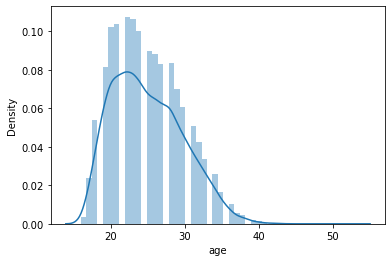

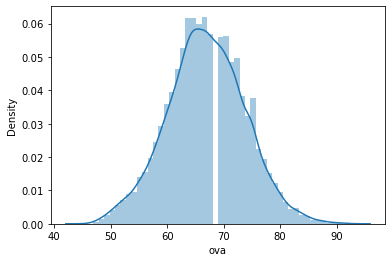

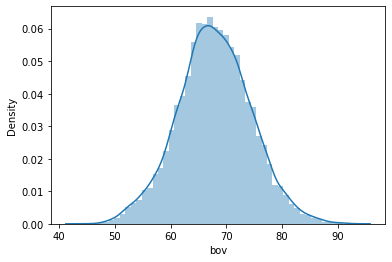

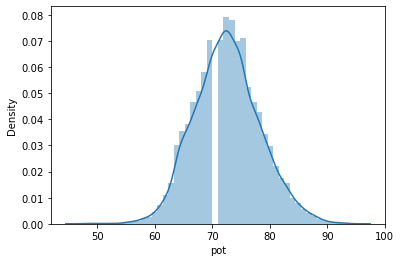

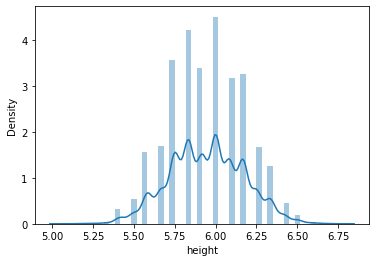

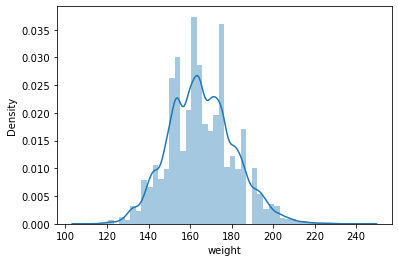

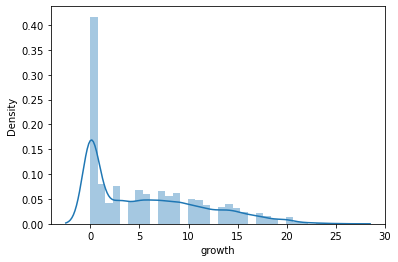

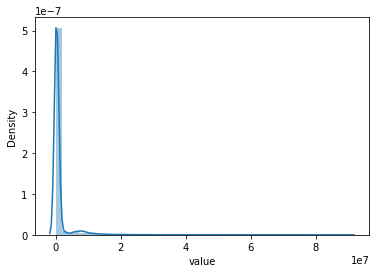

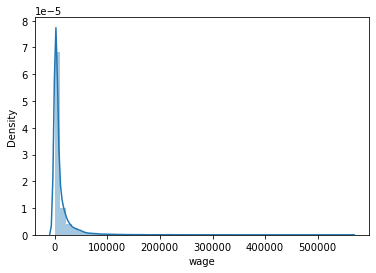

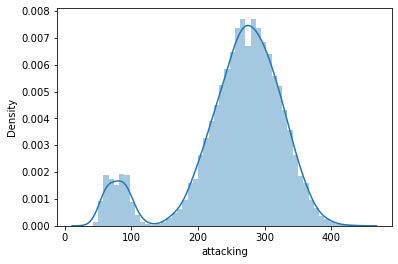

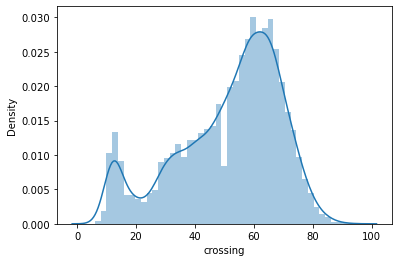

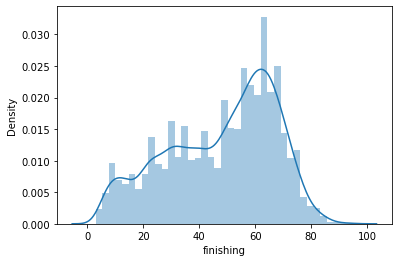

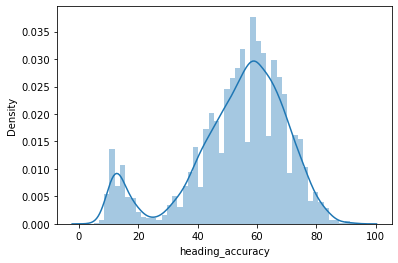

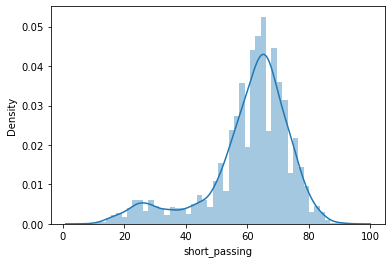

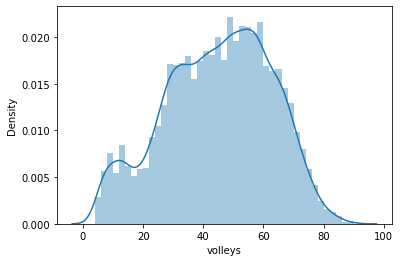

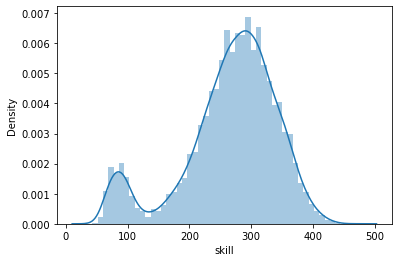

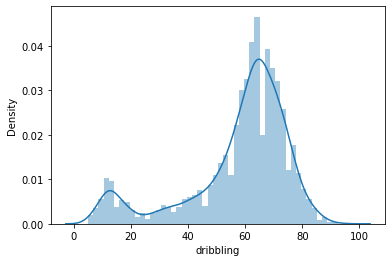

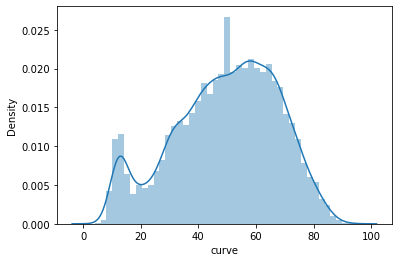

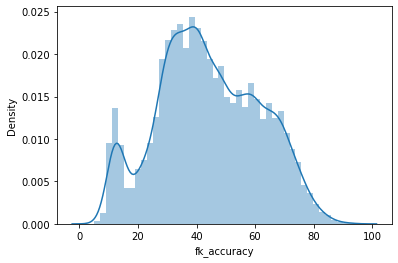

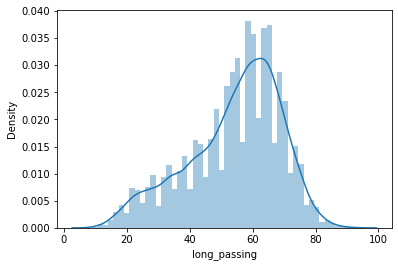

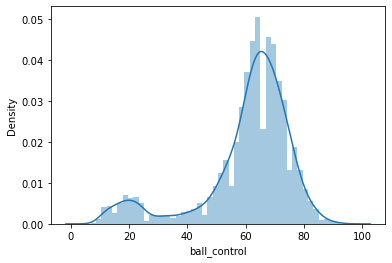

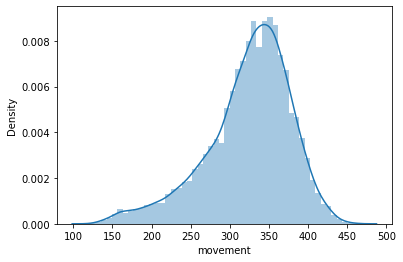

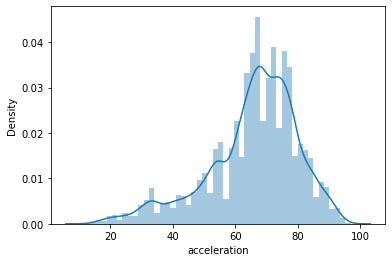

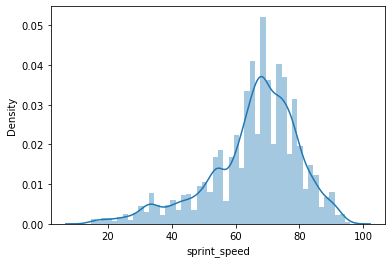

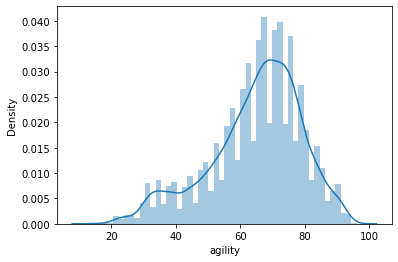

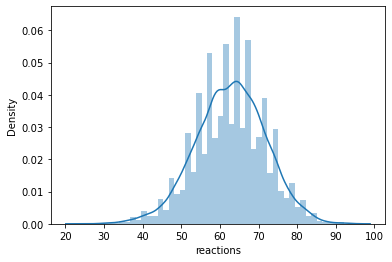

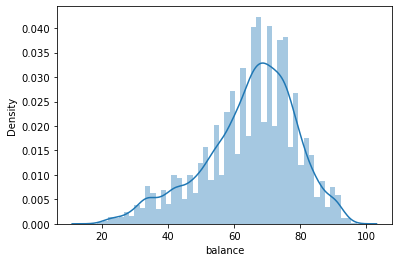

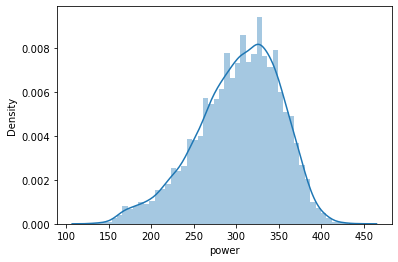

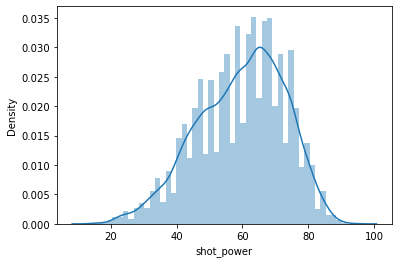

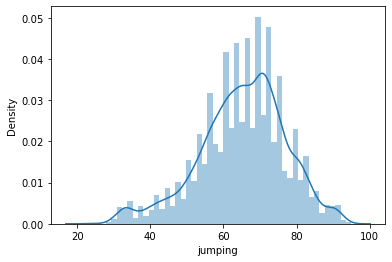

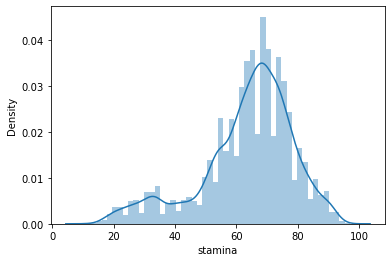

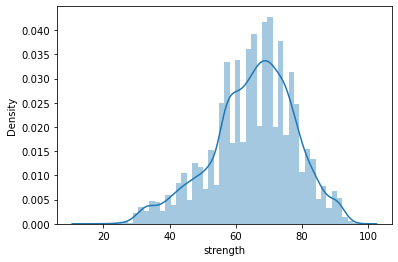

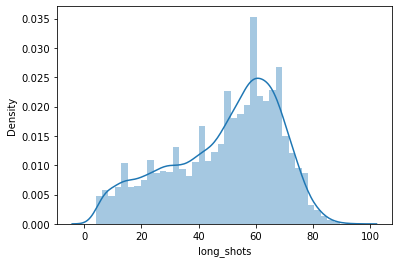

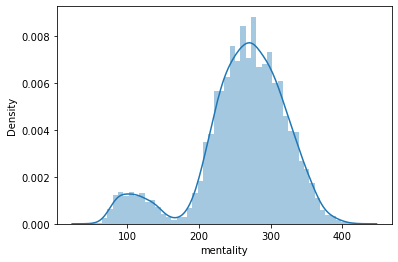

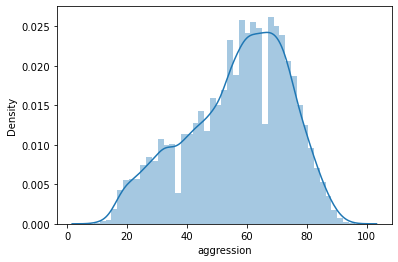

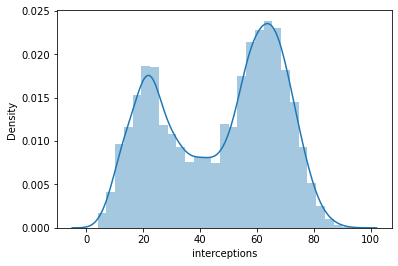

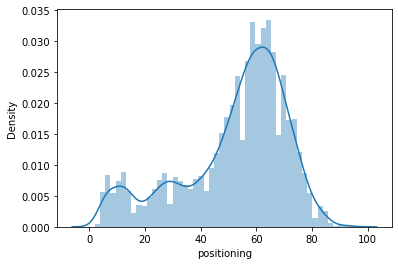

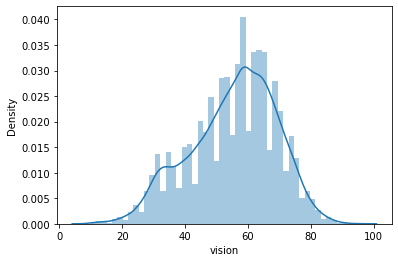

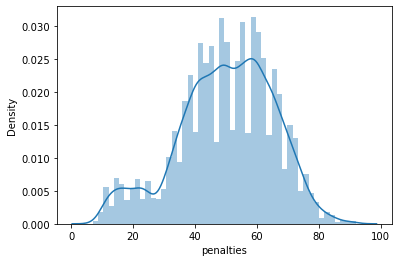

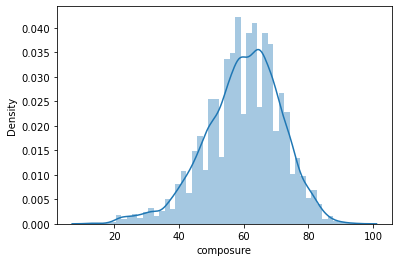

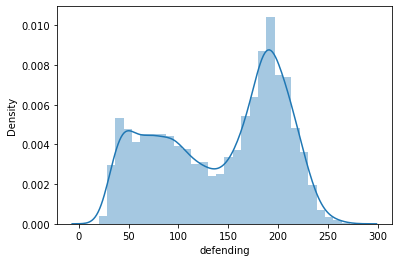

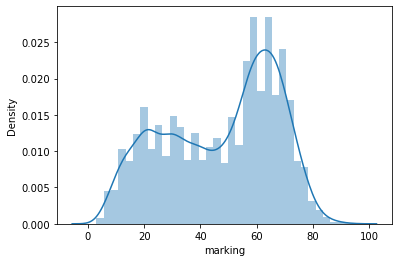

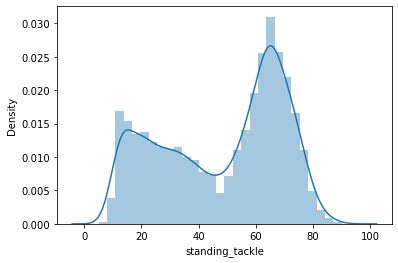

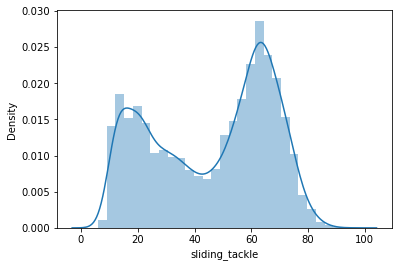

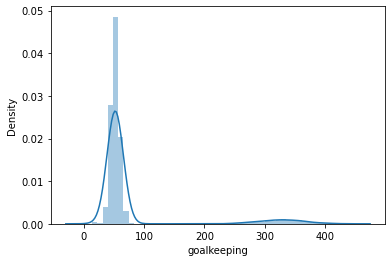

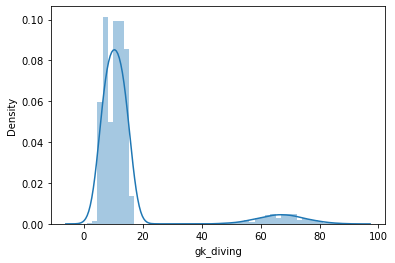

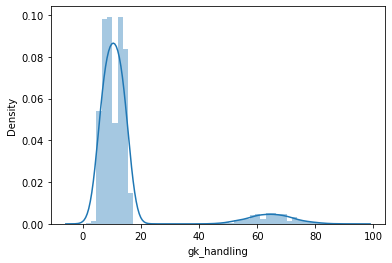

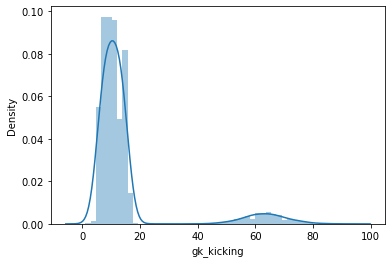

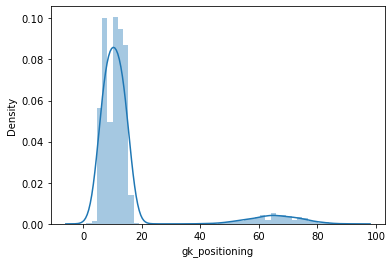

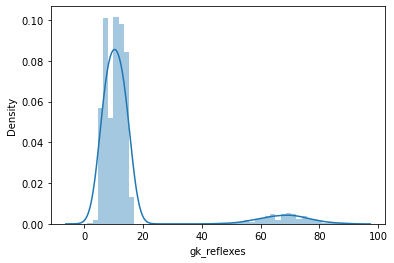

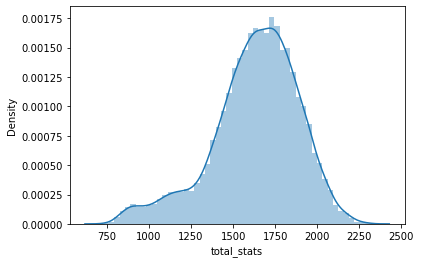

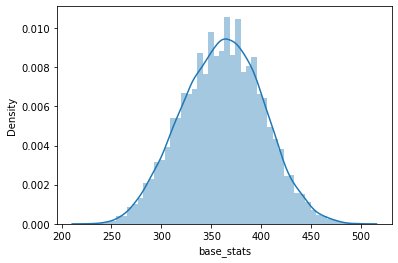

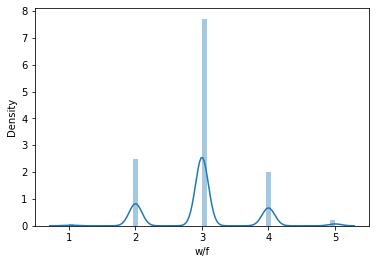

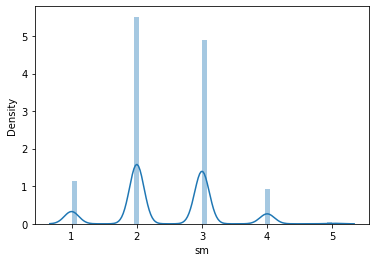

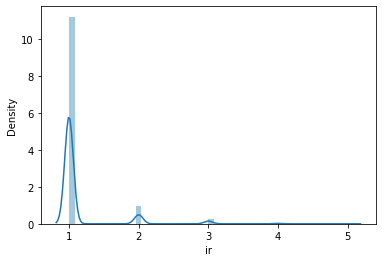

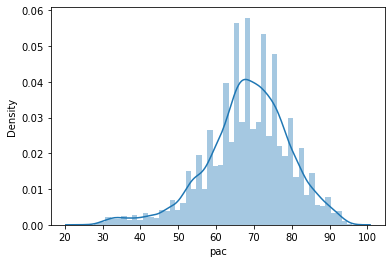

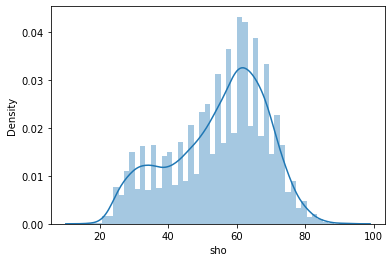

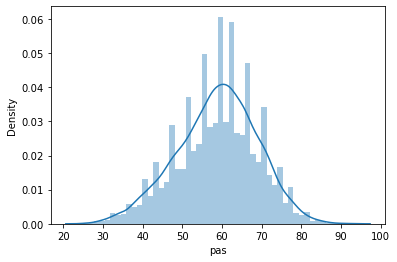

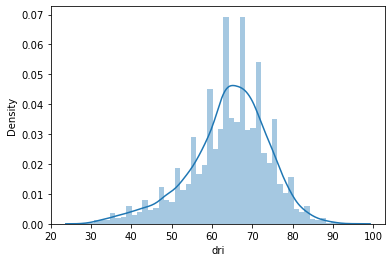

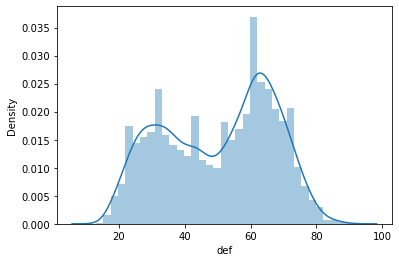

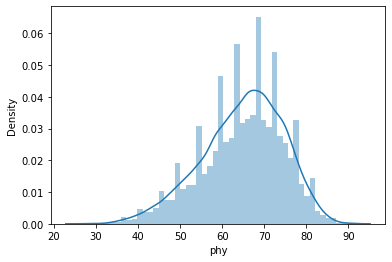

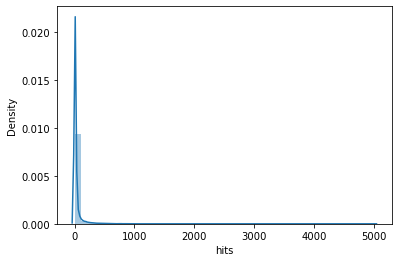

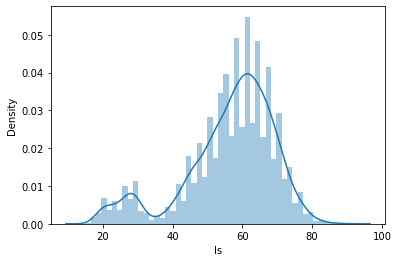

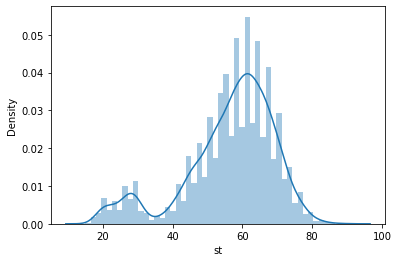

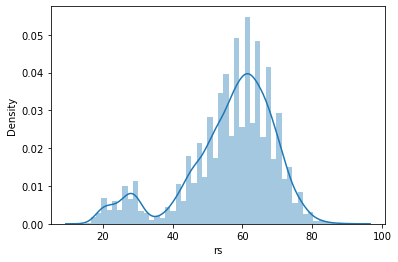

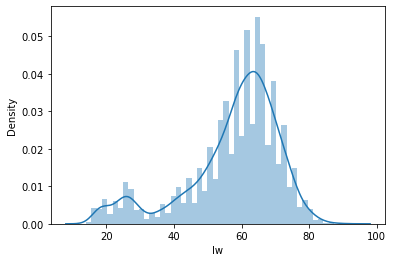

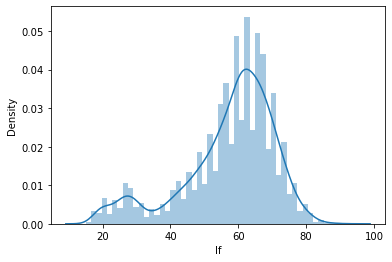

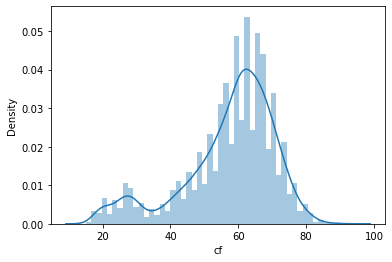

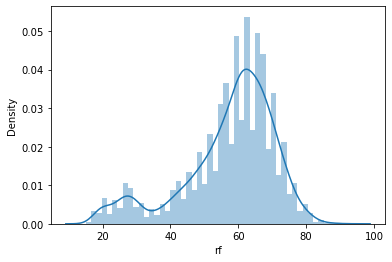

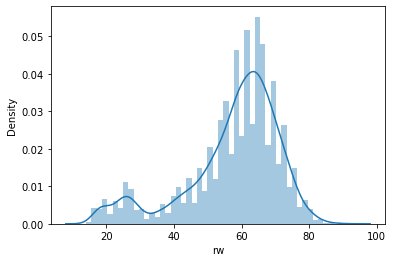

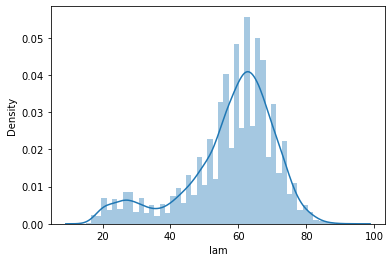

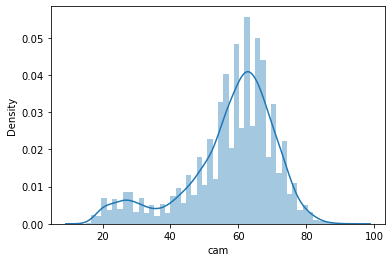

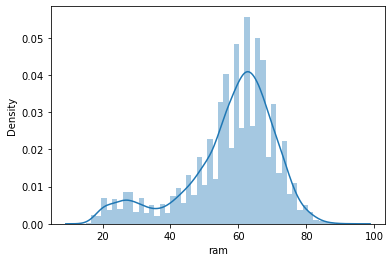

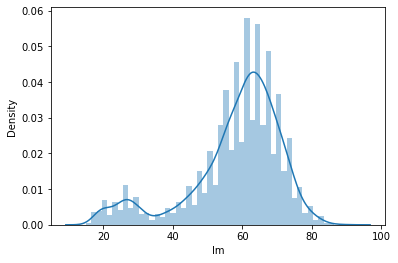

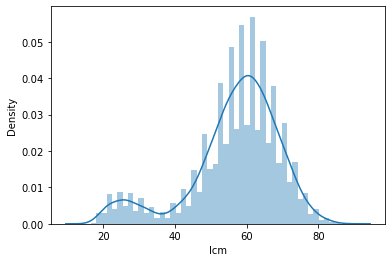

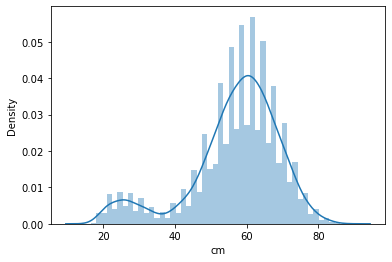

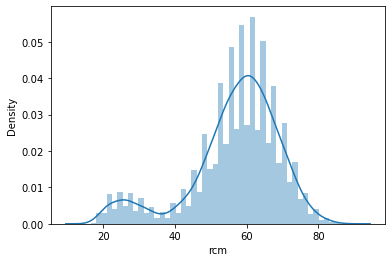

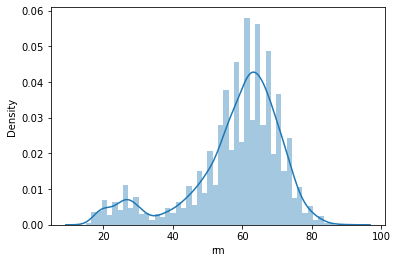

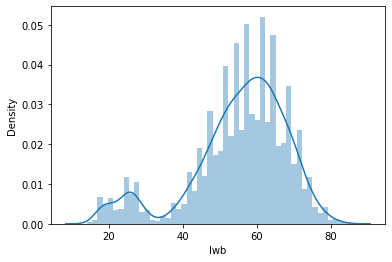

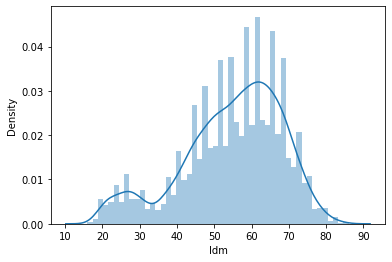

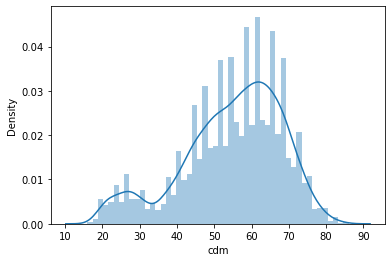

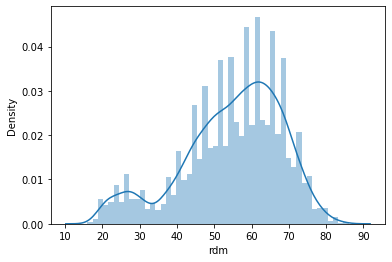

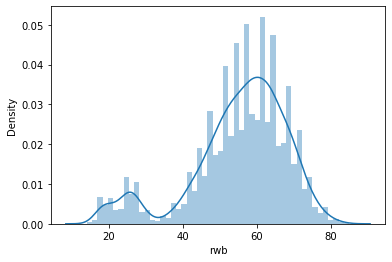

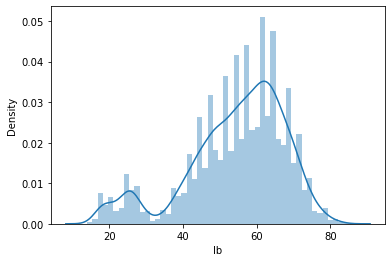

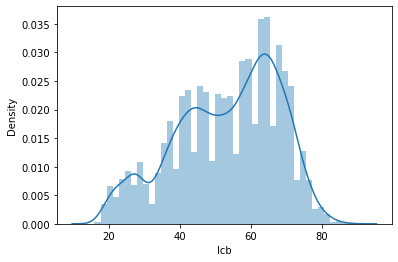

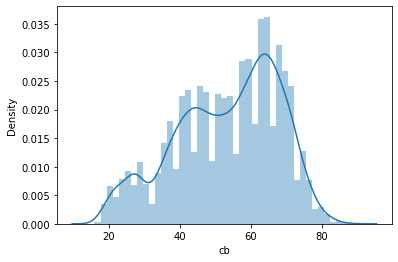

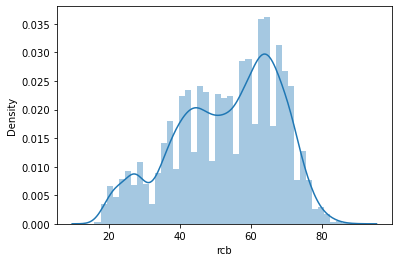

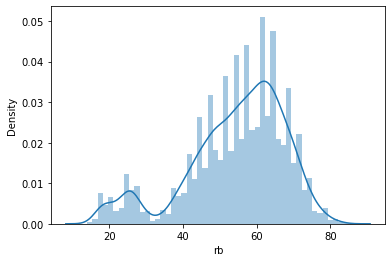

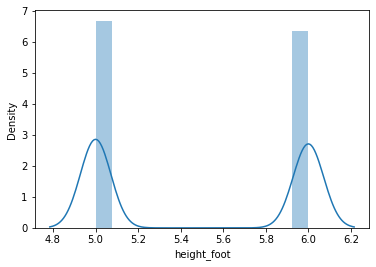

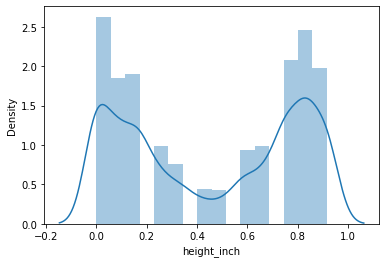

In [81]:
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    plt.show()

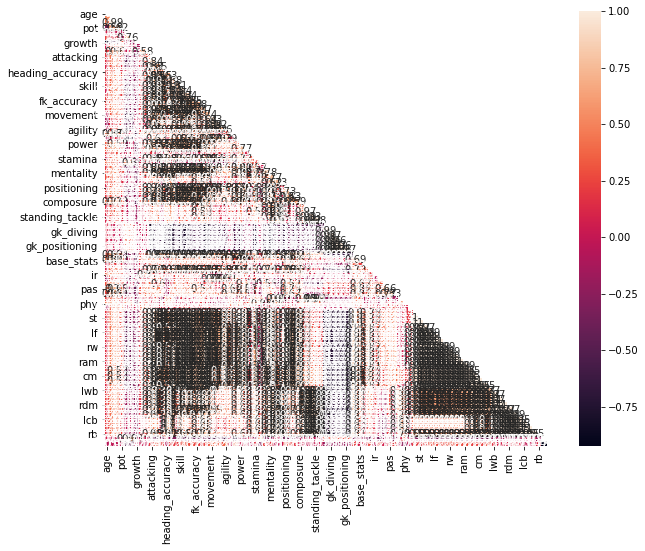

In [82]:
mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

#### Correlations of numericals with penalties

In [83]:
pd.options.display.max_rows=110
correlations=data.corr()[['penalties']].sort_values('penalties') 
correlations[(correlations ['penalties'] > 0.6) | (correlations ['penalties'] < - 0.5)]

,penalties
goalkeeping,-0.601862
gk_reflexes,-0.595802
gk_diving,-0.595456
gk_handling,-0.594836
gk_positioning,-0.593111
gk_kicking,-0.589594
vision,0.625970
crossing,0.628374
short_passing,0.660592
sm,0.671548


#### Normalize the data with boxcox (log of data given)

In [84]:
def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df #boxcox does not take negative values
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [85]:
data, _ci = boxcox_transform(data)
data

,age,ova,bov,bp,position,pot,height,weight,foot,growth,value,wage,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,height_foot,height_inch
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,2.372979,51.506113,49.740147,CM,CM CAM CDM,13.246518,4.152019,7.029014,Right,4.558940,30.805058,6.037316,67918.231812,449.872614,126.079045,682.303702,17853.100843,85.956107,25677.892458,3199.110397,158.942449,43.455533,840.026640,15140.282917,5.921044e+05,2560.192836,2199.558054,1673.660430,181.993051,1814.446211,66758.503344,527.821432,598.618322,2689.535136,632.285281,210.125031,85702.267919,347.224109,63.553554,555.066928,406.252240,230.034754,1022.559537,165.632522,91.087300,49.937742,34.410183,0.960666,1.063217,1.135156,1.167433,1.116527,1.096373,1.511443e+07,490.506566,2.443881,1.774267,Medium,Medium,0.000000,1240.818543,573.342244,318.607216,3950.151435,65.895418,2268.265666,1.015011,6116.323941,6116.323941,6116.323941,8577.370709,7081.711728,7081.711728,7081.711728,8577.370709,8025.161641,8025.161641,8025.161641,14506.454566,6998.312533,6998.312533,6998.312533,14506.454566,3589.539155,1256.301719,1256.301719,1256.301719,3589.539155,2063.039835,314.236565,314.236565,314.236565,2063.039835,0.867937,-0.167874
41,2.361888,58.182409,57.522112,CAM,CM CAM,14.208821,3.954925,7.121771,Right,4.558940,1.879093,6.268475,80780.155315,523.882128,138.177680,553.187211,27104.115134,101.157162,30826.941497,4935.667236,161.379796,39.210397,1096.461571,27197.214442,8.098056e+05,3074.062963,2811.251024,2692.635693,219.764186,1961.249038,55873.984697,442.834569,354.612088,2192.690559,668.693344,206.211429,89629.494048,258.175302,62.670272,630.266122,583.614264,213.861326,1253.677146,196.823491,88.243235,67.659961,47.843584,0.956694,0.974810,1.147472,1.005008,1.142789,1.010541,1.715621e+07,537.477950,2.443881,2.565600,High,Medium,0.082257,1481.311146,586.821582,396.047457,6166.028235,71.935636,1984.531109,1.907388,7201.113180,7201.113180,7201.113180,12649.778403,9995.483816,9995.483816,9995.483816,12649.778403,11572.832025,11572.832025,11572.832025,21062.312964,9758.322311,9758.322311,9758.322311,21062.312964,4671.891076,1513.996728,1513.996728,1513.996728,4671.891076,2583.419094,346.351670,346.351670,346.351670,2583.419094,0.867937,-0.425125
80,2.383701,55.521687,54.294509,CM,CM CDM,13.832067,3.954925,7.235665,Left,4.558940,1.091588,6.780392,69983.228137,579.155222,130.895466,373.731032,22858.396626,87.330799,30552.616238,4018.731284,168.728858,43.921846,1141.913725,20965.011241,6.066681e+05,2368.593969,1079.947050,1948.805769,200.667463,2271.078024,73676.180046,549.887788,988.606532,1679.112973,705.939999,229.955453,96719.143755,467.584289,55.590283,471.874157,510.142124,271.687273,1044.789412,206.871624,83.990225,77.910623,51.172612,0.957556,1.011688,1.120912,1.045001,1.153432,1.039062,1.721502e+07,514.638256,2.443881,2.565600,Medium,Medium,0.082239,860.722789,600.419538,382.795193,4992.785309,70.725766,2493.736885,1.269047,5911.189476,5911.189476,5911.189476,10163.980932,8075.925593,8075.925593,8075.925593,10163.980932,9414.108259,9414.108259,9414.108259,16722.304487,8440.068028,8440.068028,8440.068028,16722.304487,4111.509903,1475.834425,1475.834425,1475.834425,4111.509903,2353.107993,354.542581,354.542581,354.542581,2353.107993,0.867937,-0.425125
330,2.350405,57.518401,56.878205,CF,ST,14.115593,4.086451,7.260214,Right,4.558940,1.879093,6.191574,86705.833065,449

#### dummify categoricals

In [86]:
data = pd.get_dummies(data, drop_first=True) 
data

,age,ova,bov,pot,height,weight,growth,value,wage,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,...,position_RWB ST,position_ST,position_ST CAM,position_ST CAM CF,position_ST CAM CM,position_ST CAM LM,position_ST CAM LW,position_ST CAM RM,position_ST CAM RW,position_ST CB,position_ST CB CDM,position_ST CB RB,position_ST CF,position_ST CF CAM,position_ST CF LM,position_ST CF LM CAM,position_ST CF LW,position_ST CF RM,position_ST CF RW,position_ST CM,position_ST CM CAM,position_ST LM,position_ST LM CAM,position_ST LM CF,position_ST LM LW,position_ST LM RB,position_ST LM RM,position_ST LM RW,position_ST LW,position_ST LW CAM,position_ST LW CF,position_ST LW LM,position_ST LW LWB,position_ST LW RM,position_ST LW RW,position_ST RB RM,position_ST RM,position_ST RM CAM,position_ST RM CF,position_ST RM LM,position_ST RM LW,position_ST RM RB,position_ST RM RW,position_ST RM RWB,position_ST RW,position_ST RW CAM,position_ST RW CF,position_ST RW LM,position_ST RW LW,position_ST RW RM,foot_Right,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,2.372979,51.506113,49.740147,13.246518,4.152019,7.029014,4.558940,30.805058,6.037316,67918.231812,449.872614,126.079045,682.303702,17853.100843,85.956107,25677.892458,3199.110397,158.942449,43.455533,840.026640,15140.282917,5.921044e+05,2560.192836,2199.558054,1673.660430,181.993051,1814.446211,66758.503344,527.821432,598.618322,2689.535136,632.285281,210.125031,85702.267919,347.224109,63.553554,555.066928,406.252240,230.034754,1022.559537,165.632522,91.087300,49.937742,34.410183,0.960666,1.063217,1.135156,1.167433,1.116527,1.096373,1.511443e+07,490.506566,2.443881,1.774267,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
41,2.361888,58.182409,57.522112,14.208821,3.954925,7.121771,4.558940,1.879093,6.268475,80780.155315,523.882128,138.177680,553.187211,27104.115134,101.157162,30826.941497,4935.667236,161.379796,39.210397,1096.461571,27197.214442,8.098056e+05,3074.062963,2811.251024,2692.635693,219.764186,1961.249038,55873.984697,442.834569,354.612088,2192.690559,668.693344,206.211429,89629.494048,258.175302,62.670272,630.266122,583.614264,213.861326,1253.677146,196.823491,88.243235,67.659961,47.843584,0.956694,0.974810,1.147472,1.005008,1.142789,1.010541,1.715621e+07,537.477950,2.443881,2.565600,0.082257,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
80,2.383701,55.521687,54.294509,13.832067,3.954925,7.235665,4.558940,1.091588,6.780392,69983.228137,579.155222,130.895466,373.731032,22858.396626,87.330799,30552.616238,4018.731284,168.728858,43.921846,1141.913725,20965.011241,6.066681e+05,2368.593969,1079.947050,1948.805769,200.667463,2271.078024,73676.180046,549.887788,988.606532,1679.112973,705.939999,229.955453,96719.143755,467.584289,55.590283,471.874157,510.142124,271.687273,1044.789412,206.871624,83.990225,77.910623,51.172612,0.957556,1.011688,1.120912,1.045001,1.153432,1.039062,1.721502e+07,514.638256,2.443881,2.565600,0.082239,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
330,2.350405,57.518401,56.878205,14.115593,4.086451,7.260214,4.558940,1.879093,6.191574,86705.833065,449.872614,175.551557,721.253587,20895.088590,108.121066,26314.312972,4580.362140,166.273060,35.842680,685.026051,22935.587549,1.021968e+06,4001.083785,4280.131736,2560.501527,251.149273,2379.139837,8423

### Now choosing target value = penalties
### Understanding of penalties: The player who got fouled gets a penalty shot at the goal, and penalties is the rate if he scores ( does hit the goal)

In [87]:
X = data.drop('penalties', axis=1)
y = data['penalties'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Regression Model

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [89]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9754179994242967, 6.166921098934235, 8.411064353821832)

In [90]:
import math
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['penalties'])
results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['penalties'])
results['pred'] = np.nan_to_num(predictions) # had 3 nulls in pred, dealing with them
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
id,,,
244049,45.0,43.866930,1.133070
193910,62.0,63.050007,1.050007
257409,33.0,34.917663,1.917663
219551,44.0,44.902935,0.902935
212750,63.0,61.518357,1.481643
...,...,...,...
245532,65.0,65.973231,0.973231
219985,56.0,55.875313,0.124687
193314,24.0,27.996967,3.996967


In [91]:
results.sort_values('resid', ascending=False)

,true,pred,resid
id,,,
165247,49.0,29.339732,19.660268
227290,9.0,28.044216,19.044216
205530,62.0,43.591425,18.408575
247346,24.0,8.099592,15.900408
167495,47.0,31.975511,15.024489
...,...,...,...
232764,47.0,47.001263,0.001263
231505,42.0,41.998853,0.001147
231607,56.0,56.000267,0.000267


In [92]:
results.isna().sum()

true     0
pred     0
resid    0
dtype: int64

In [93]:
results.describe()

,true,pred,resid
count,4925.000000,4925.000000,4925.000000
mean,49.819492,49.868485,1.814944
std,15.496341,15.393455,1.836654
min,7.000000,0.000000,0.000032
25%,40.000000,40.331683,0.611053
50%,51.000000,51.097696,1.313372
75%,61.000000,61.066277,2.435262
max,92.000000,97.234158,19.660268


<AxesSubplot:xlabel='true', ylabel='pred'>

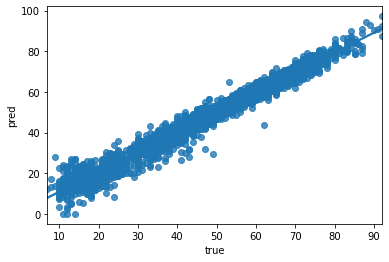

In [94]:
sns.regplot(results['true'], results['pred'])

### More conclusions/insights:
### The top correlations with penalties:
	
#### 1. rs	0.846197 values for right storm
#### 1. st	0.846197 values for storm
#### 1. ls	0.846197 value for left storm
#### storm positions are probabely the most attacked ones and maybe the best goal shooter as well,
#### so they get more penalty goal chances are also more likely to score a goal in that sitiuation

#### 2. finishing:	0.842858 The accuracy of shots using foot, inside the penalty -
#### of course this must be correlated with penalties: probabely penalty shots are given inside the penalty...

#### 3. volleys: 0.841875 taking the ball out of the air (explanation: talented players ?) or this is a dangerous situation for the opposite team and players in those situation get often fouled and then get chance for penalty goals


#### 4.  attacking: 0.840669 : probabely if attacking, defenders fouls the player and he gets more chances for                                       penalty goals and / or storm does most attacking

#### ...

#### 6. long_shots:	0.799352 
##### 'To perform the long-shot, players on the right side of the net should 
##### shoot with their right foot while aiming at the left side of the net. 
##### Likewise, players on the left should take the shot with their left foot 
##### and aim at the top right corner of the net'
##### ? maybe thats a penalty goal situation?
